In [1]:
import tensorflow as tf

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
image1=mnist.train.images[419]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

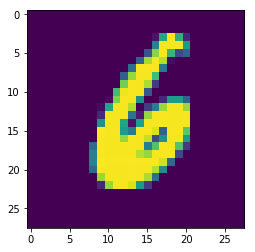

In [10]:
plt.imshow(image1)
plt.show()

In [11]:
mnist.train.images.shape,mnist.train.labels.shape

((55000, 784), (55000, 10))

In [12]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [13]:
mnist.validation.images.shape,mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [14]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),  # weight matrix for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    # weight matrix for layer 2
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) # weight matrix for layer 3
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         # biases for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         # biases for layer 1
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      # biases for layer 1
}

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [16]:

x=tf.placeholder('float',[None,n_input])      #since no. of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,n_output])

pred=fwd_prop(x,weights,biases)



In [17]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) #logits is because of multiple classes 

In [18]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [19]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost) 

23816.081870913506
4701.571799575351
2481.906361247299
1640.1076044442482
1308.454119856934
1184.0535039945407
1034.6429982541954
909.280847138089
789.4871495185715
748.6612629789228
672.1974510058551
529.4657778861119
517.1760691585143
428.7773267619015
530.5871581305755
401.6728062686476
299.68133096374464
284.52775829103257
331.1375339737757
271.03548644373166
227.71323144423855
175.40915679896617
249.58921063965806
228.3290035539998
182.57559609203503


In [21]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones,labels,correct_preds=sess.run([predictions, true_labels,correct_preds],feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones,labels,correct_preds

(array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([7, 2, 1, ..., 4, 5, 6], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [22]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]